In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
merged_data = pd.read_pickle('merged_data_pct_change.pkl')

# Create train data and test data

In [5]:
X = merged_data['rawText']
y = merged_data['1day relative pct change']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Tf-Idf and DNN model

In [7]:
tfidf = TfidfVectorizer(max_df=0.4, min_df=300, ngram_range=(1,2), stop_words='english')

In [8]:
tfidf_vectors = tfidf.fit_transform(X_train).astype(np.float32)

In [9]:
dense_tfidf_vectors = tfidf_vectors.toarray()

In [10]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=dense_tfidf_vectors.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=3)

In [12]:
'''
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''

'\nkfold = KFold(n_splits=10)\nresults = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)\nprint("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))\n'

In [13]:
estimator.fit(dense_tfidf_vectors, y_train)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [14]:
test_vectors = tfidf.transform(X_test).astype(np.float32)

In [15]:
test_vectors = test_vectors.toarray()

In [16]:
y_predicted = estimator.predict(test_vectors)

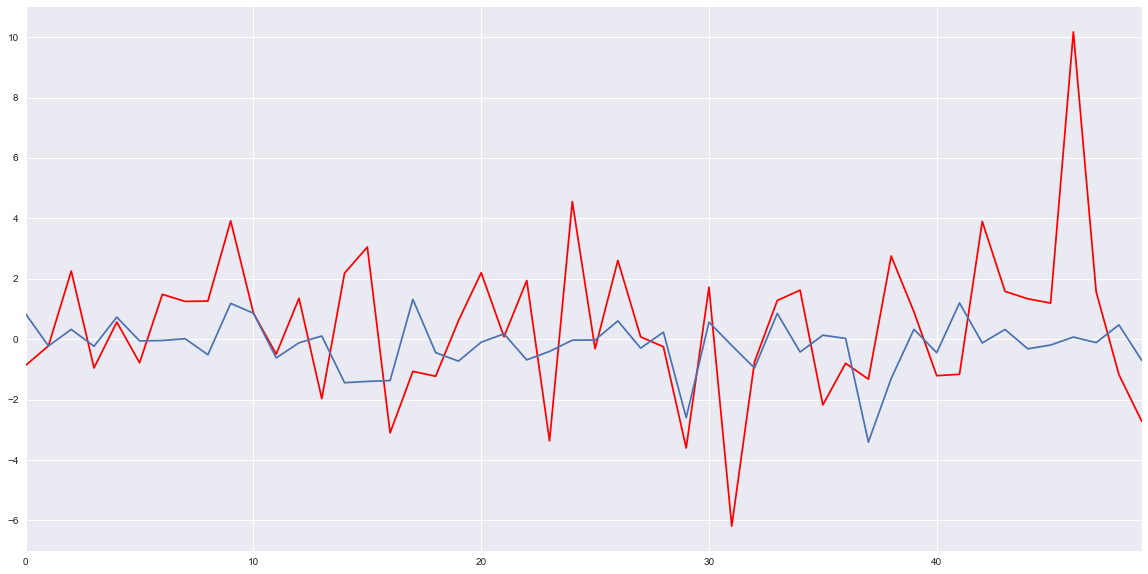

In [17]:
plt.figure(figsize=(20,10))
sns.tsplot(y_test[0:50], color='r')
sns.tsplot(y_predicted[0:50])

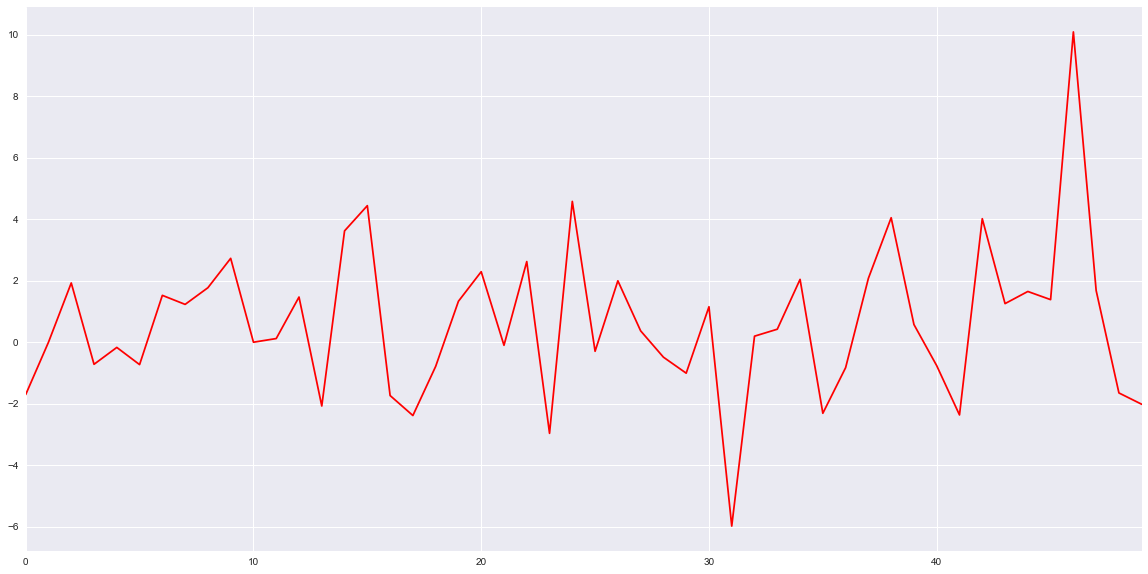

In [18]:
plt.figure(figsize=(20,10))
#sns.tsplot(y_test[0:50])
error = y_test-y_predicted
sns.tsplot(error[0:50], color='r')

In [19]:
error_value = mean_squared_error(y_test, y_predicted)

In [20]:
error_value

16.481295024283657